In [7]:
from glob import glob
import numpy as np
import pandas as pd
import xarray as xr
import plotting_utils as pu

from utils import city_list
from utils import roar_data_path as project_data_path
from utils import gev_metric_ids, get_unique_loca_metrics

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
# Set fonts
from matplotlib import font_manager

font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

### Climate info

In [9]:
# Get all climate info
out = []
for metric_id in gev_metric_ids:
    #### LOCA2
    ensemble = "LOCA2"
    df_loca = get_unique_loca_metrics(metric_id)

    # Loop through
    delayed = []
    for index, row in df_loca.iterrows():
        # Get info
        gcm, member, ssp = row["gcm"], row["member"], row["ssp"]
        if ssp == "historical":
            continue
        out.append(
            pd.DataFrame(
                {"ensemble": [ensemble], "gcm": [gcm], "member": [member], "ssp": [ssp]}
            )
        )

    #### STAR-ESDM
    ensemble = "STAR-ESDM"
    files = glob(f"{project_data_path}/metrics/{ensemble}/{metric_id}_*")

    # Loop through
    for file in files:
        # Get info
        _, _, gcm, member, ssp = file.split("/")[-1].split(".")[0].split("_")

        # Fit for historical and ssp
        for ssp_id in ["historical", ssp]:
            if ssp_id == "historical":
                continue
            out.append(
                pd.DataFrame(
                    {
                        "ensemble": [ensemble],
                        "gcm": [gcm],
                        "member": [member],
                        "ssp": [ssp],
                    }
                )
            )

    #### GARD-LENS
    ensemble = "GARD-LENS"
    files = glob(f"{project_data_path}/metrics/{ensemble}/{metric_id}_*")

    # Loop through
    for file in files:
        # Get info
        info = file.split("/")[-1].split("_")
        gcm = info[2]
        ssp = info[-1].split(".")[0]
        member = f"{info[3]}_{info[4]}" if gcm == "cesm2" else info[3]

        # Do for historical and ssp
        for ssp_id in ["historical", ssp]:
            if ssp_id == "historical":
                continue
            out.append(
                pd.DataFrame(
                    {
                        "ensemble": [ensemble],
                        "gcm": [gcm],
                        "member": [member],
                        "ssp": [ssp],
                    }
                )
            )

# Store all
pd.concat(out, ignore_index=True).drop_duplicates().to_csv(
    f"{project_data_path}/ensemble_info.csv", index=False
)

### Maps

In [45]:
# Example
gcm = "CanESM5"
ssp = "ssp370"
member = "r1i1p1f1"

ds_loca = xr.open_dataset(
    "/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/metrics/LOCA2/max_pr_CanESM5_r1i1p1f1_ssp370_2045-2074.nc"
)
ds_gard = xr.open_dataset(
    "/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/metrics/GARD-LENS/max_pr_canesm5_r1i1p1f1_ssp370.nc"
)

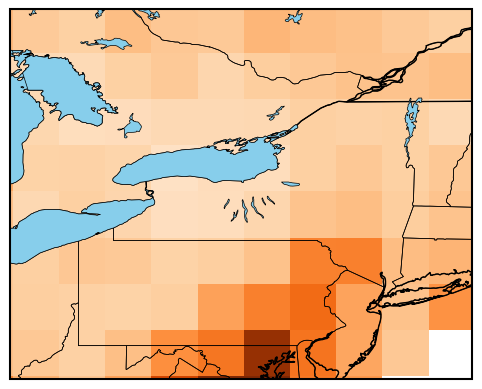

In [58]:
# Create the figure and axis with projection
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

# Plot the data
ds_gard.sel(time="2050-12-31")["pr"].coarsen(lat=8, lon=8, boundary="pad").mean().plot(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap="Oranges", vmax=190
)
ax.set_title("")
ax.set_extent([-82, -72, 39, 47], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAKES, facecolor="skyblue", edgecolor="black", linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=1)

plt.show()

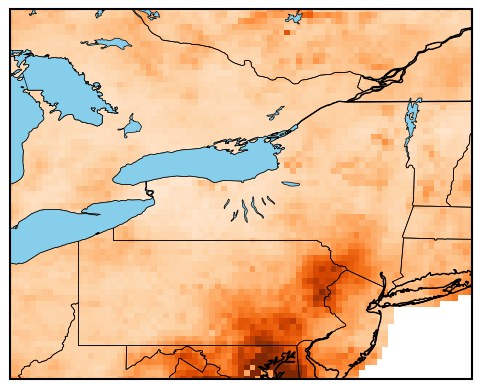

In [52]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create the figure and axis with projection
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

# Plot the data
ds_gard.sel(time="2050-12-31")["pr"].plot(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap="Oranges", vmax=190
)
ax.set_title("")
ax.set_extent([-82, -72, 39, 47], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAKES, facecolor="skyblue", edgecolor="black", linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=1)

plt.show()

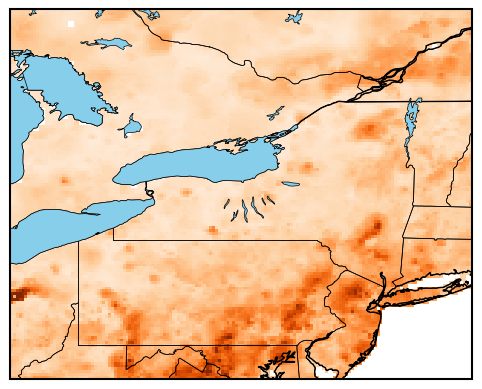

In [51]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create the figure and axis with projection
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

# Plot the data
ds_loca.sel(time="2050-12-31")["pr"].plot(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap="Oranges", vmax=190
)
ax.set_title("")
ax.set_extent([-82, -72, 39, 47], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAKES, facecolor="skyblue", edgecolor="black", linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=1)

plt.show()

### Map plot

In [61]:
ds = xr.open_dataset(
    "/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/extreme_value/original_grid/max_pr/GARD-LENS_canesm5_r10i1p1f1_ssp370_2050-2100_stat_lmom.nc"
)

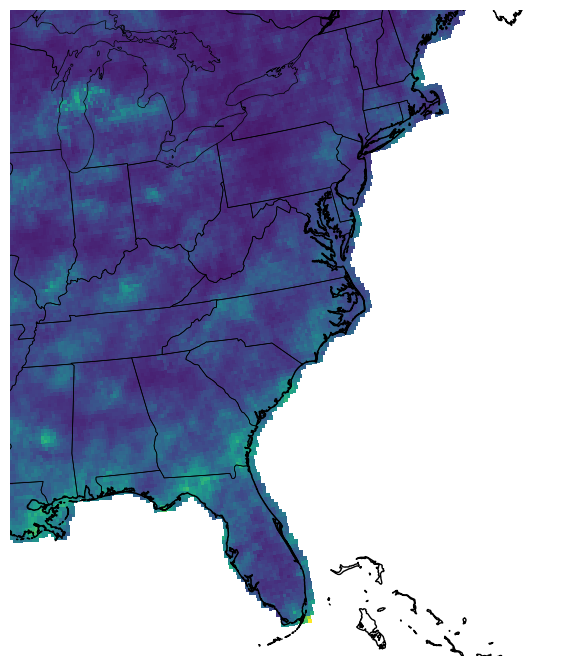

In [65]:
fig, ax = plt.subplots(
    subplot_kw=dict(projection=ccrs.LambertConformal()), figsize=(6, 8)
)

ds["100yr_return_level"].plot(
    ax=ax, transform=ccrs.PlateCarree(), cmap="viridis", add_colorbar=False
)

# Tidy
ax.set_extent([-90, -70, 25, 45], ccrs.Geodetic())
ax.coastlines(resolution="10m")
ax.set_title("")
ax.add_feature(cfeature.STATES, edgecolor="black", linewidth=0.5)
# ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidth=0.25)
ax.axis("off")
plt.tight_layout()
plt.savefig("../figs/map_example.png", dpi=600)

### UC results: gridpoint

In [3]:
# Read UC results
file_path = f"{project_data_path}/results/max_pr_2050-2100_1950-2014_100rl_nearest.nc"
uc = xr.open_dataset(file_path)

In [159]:
city = "nyc"
ds_plot = uc.sel(lat=city_list[city][0], lon=360 + city_list[city][1], method="nearest")

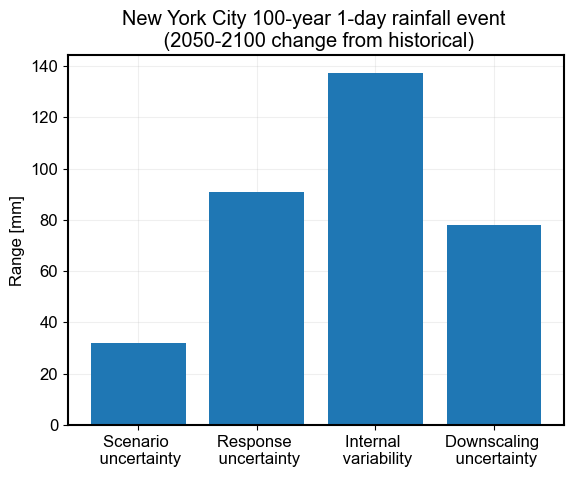

In [160]:
fig, ax = plt.subplots()
uc_vals = [  # ds_plot['uc_range'],
    ds_plot["ssp_uc"],
    ds_plot["gcm_uc"],
    ds_plot["iv_uc"],
    ds_plot["dsc_uc"],
]
uc_names = [  #'Total \n uncertainty',
    "Scenario \n uncertainty",
    "Response \n uncertainty",
    "Internal \n variability",
    "Downscaling \n uncertainty",
]

ax.bar(uc_names, uc_vals, zorder=2)
ax.set_ylabel("Range [mm]")
ax.set_title(
    "New York City 100-year 1-day rainfall event \n (2050-2100 change from historical)"
)
ax.grid(alpha=0.2, zorder=3)
plt.savefig("../figs/nyc_change_uc_example.png", dpi=300)

### Timeseries with RL

In [13]:
# Read timeseries
metric_id = "max_pr"
gcm = "CanESM5"
ssp = "ssp370"
ensemble = "LOCA2"
member = "r1i1p1f1"

city = "nyc"
lat, lon = city_list[city]

ds_fut = xr.open_mfdataset(
    f"{project_data_path}/metrics/LOCA2/{metric_id}_{gcm}_{member}_{ssp}_*.nc"
).sel(lat=lat, lon=360 + lon, method="nearest")
ds_hist = xr.open_mfdataset(
    f"{project_data_path}/metrics/LOCA2/{metric_id}_{gcm}_{member}_historical_*.nc"
).sel(lat=lat, lon=360 + lon, method="nearest")

ds_gard = xr.open_dataset(
    f"{project_data_path}/metrics/GARD-LENS/{metric_id}_canesm5_{member}_{ssp}.nc"
).sel(lat=lat, lon=lon, method="nearest")

In [5]:
# Read RLs
ds_rl_fut = xr.open_dataset(
    f"{project_data_path}/extreme_value/original_grid/{metric_id}/{ensemble}_{gcm}_{member}_{ssp}_2050-2100_stat_lmom.nc"
).sel(lat=lat, lon=360 + lon, method="nearest")
ds_rl_hist = xr.open_dataset(
    f"{project_data_path}/extreme_value/original_grid/{metric_id}/{ensemble}_{gcm}_{member}_historical_1950-2014_stat_lmom.nc"
).sel(lat=lat, lon=360 + lon, method="nearest")

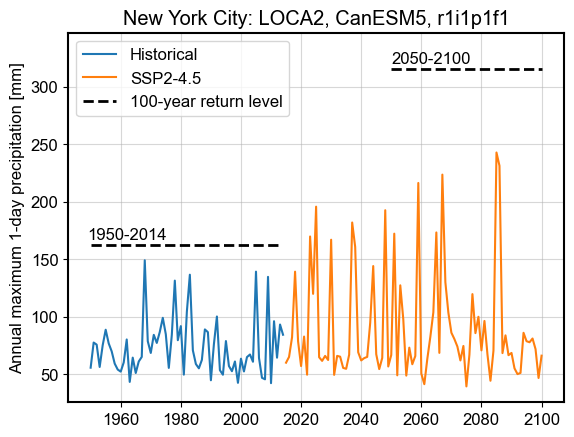

In [24]:
fig, ax = plt.subplots()

# Hist
ax.plot(np.arange(1950, 2015), ds_hist["pr"], label="Historical", color="C0")

ax.hlines(ds_rl_hist["100yr_return_level"], 1950, 2013, colors="black", ls="--", lw=2)
ax.text(1949, ds_rl_hist["100yr_return_level"] + 5, "1950-2014")

# Proj
ax.plot(
    np.arange(2015, 2101),
    ds_fut["pr"].sel(time=slice("2015", "2101")),
    label="SSP2-4.5",
    color="C1",
)

ax.hlines(
    ds_rl_fut["100yr_return_level"],
    2050,
    2100,
    colors="black",
    ls="--",
    lw=2,
    label="100-year return level",
)
ax.text(2050, ds_rl_fut["100yr_return_level"] + 5, "2050-2100")

ax.set_xlabel("")
ax.set_ylabel("Annual maximum 1-day precipitation [mm]")
ax.grid(alpha=0.5)
ax.set_title(f"New York City: {ensemble}, {gcm}, {member}")
ax.set_ylim([ax.get_ylim()[0], ds_rl_fut["100yr_return_level"] * 1.1])
ax.legend()

plt.savefig("../figs/nyc_timeseries_example.pdf")

### NYC plots

In [95]:
ssp_colors = {
    "ssp245": "#1b9e77",
    "ssp370": "#7570b3",
    "ssp585": "#d95f02",
}
ssp_labels = {
    "ssp245": "Medium",
    "ssp370": "High",
    "ssp585": "Extreme",
}

In [96]:
df_cdd = (
    pd.read_csv(
        "/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/metrics/cities/nyc_max_cdd.csv"
    )
    .groupby(["gcm", "member", "ssp", "ensemble"])["cdd"]
    .max()
    .reset_index()
)
df_hdd = (
    pd.read_csv(
        "/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/metrics/cities/nyc_max_hdd.csv"
    )
    .groupby(["gcm", "member", "ssp", "ensemble"])["hdd"]
    .max()
    .reset_index()
)

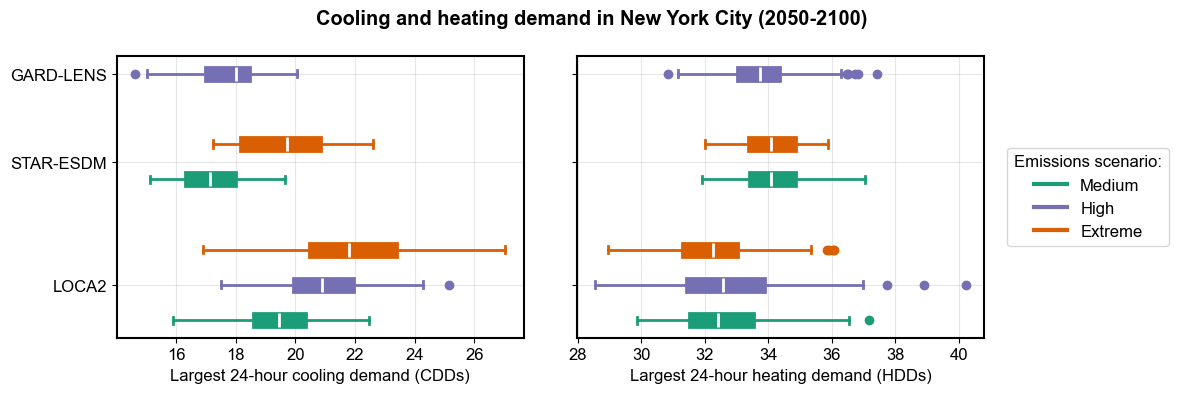

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True, width_ratios=[4, 4, 1])

fig.suptitle(
    "Cooling and heating demand in New York City (2050-2100)", fontweight="bold"
)

#########
# CDD
df = df_cdd.copy()
ax = axs[0]

# Filter
df_sel = df[(df["ssp"] != "historical") & (df["gcm"] != "TaiESM1")]

# Plot
idy = 0

for ensemble in df_sel["ensemble"].unique():
    idy += 1
    df_ens_sel = df_sel[df_sel["ensemble"] == ensemble]
    for ssp in df_ens_sel["ssp"].unique():
        pu.plot_boxplot(
            df_ens_sel[df_ens_sel["ssp"] == ssp],
            "cdd",
            [idy],
            ssp_colors[ssp],
            ax,
            lw=2,
        )
        idy += 1

# Manual labels
ax.set_yticks([2, 5.5, 8], ["LOCA2", "STAR-ESDM", "GARD-LENS"])
ax.grid(alpha=0.3)
ax.set_xlabel("")
ax.set_xlabel("Largest 24-hour cooling demand (CDDs)")

##############
# HDD
df = df_hdd.copy()
ax = axs[1]

# Filter
df_sel = df[(df["ssp"] != "historical") & (df["gcm"] != "TaiESM1")]

# Plot
idy = 0

for ensemble in df_sel["ensemble"].unique():
    idy += 1
    df_ens_sel = df_sel[df_sel["ensemble"] == ensemble]
    for ssp in df_ens_sel["ssp"].unique():
        pu.plot_boxplot(
            df_ens_sel[df_ens_sel["ssp"] == ssp],
            "hdd",
            [idy],
            ssp_colors[ssp],
            ax,
            lw=2,
        )
        idy += 1

# Manual labels
ax.set_yticks([2, 5.5, 8], ["LOCA2", "STAR-ESDM", "GARD-LENS"])
ax.grid(alpha=0.3)
ax.set_xlabel("Largest 24-hour heating demand (HDDs)")

########## Add legend
legend_elements = [
    Line2D([0], [0], color=ssp_colors[ssp], label=ssp_labels[ssp], lw=3)
    for ssp in ssp_colors.keys()
]
axs[2].legend(handles=legend_elements, title="Emissions scenario:", loc="center")
axs[2].axis("off")

plt.tight_layout()
plt.savefig("../figs/nyc_cooling_heating_2050-2100.png", dpi=400)

In [88]:
# df_cdd = pd.read_csv('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/extreme_value/cities/original_grid/freq/nyc_max_cdd_2050-2100_1950-2014_return_levels_lmom_stat.csv')
# df_hdd = pd.read_csv('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/extreme_value/cities/original_grid/freq/nyc_max_hdd_2050-2100_1950-2014_return_levels_lmom_stat.csv')

In [87]:
# fig, axs = plt.subplots(1,2, figsize=(12,4), sharey=True)

# fig.suptitle('New York City Energy-relevant Climate Projections (2050-2100)', fontweight='bold')

# #########
# # CDD
# df = df_cdd.copy()
# ax = axs[0]

# # Filter
# df_sel = df[(df['ssp'] != 'historical') & (df['gcm'] != 'TaiESM1')]

# # Plot
# idy = 0

# for ensemble in df_sel['ensemble'].unique():
#     idy += 1
#     df_ens_sel = df_sel[df_sel['ensemble'] == ensemble]
#     for ssp in df_ens_sel['ssp'].unique():
#         pu.plot_boxplot(df_ens_sel[df_ens_sel['ssp'] == ssp],
#                         '100yr_return_level',
#                         [idy],
#                         ssp_colors[ssp],
#                         ax,
#                         lw=2)
#         idy += 1

# # Manual labels
# ax.set_yticks([2, 5.5, 8], ['LOCA2', 'STAR-ESDM', 'GARD-LENS'])
# ax.grid(alpha=0.3)
# ax.set_xlabel('')
# ax.set_xlabel('Largest 24-hour cooling demand (CDDs)')

# ##############
# # HDD
# df = df_hdd.copy()
# ax = axs[1]

# # Filter
# df_sel = df[(df['ssp'] != 'historical') & (df['gcm'] != 'TaiESM1')]

# # Plot
# idy = 0

# for ensemble in df_sel['ensemble'].unique():
#     idy += 1
#     df_ens_sel = df_sel[df_sel['ensemble'] == ensemble]
#     for ssp in df_ens_sel['ssp'].unique():
#         pu.plot_boxplot(df_ens_sel[df_ens_sel['ssp'] == ssp],
#                         '100yr_return_level',
#                         [idy],
#                         ssp_colors[ssp],
#                         ax,
#                         lw=2)
#         idy += 1

# # Manual labels
# ax.set_yticks([2, 5.5, 8], ['LOCA2', 'STAR-ESDM', 'GARD-LENS'])
# ax.grid(alpha=0.3)
# ax.set_xlabel('Largest 24-hour heating demand (HDDs)')

# plt.show()